## 1. Import libraries and load datasets 

In [1]:
# Data preprocessing 
import pandas as pd

# Efficient vectorial calculus
import numpy as np

# Timer
import time

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# Load dataset in a Pandas DataFrame object from a .csv file
df = pd.read_csv('../data/loan.csv', low_memory=False)

# Show first rows
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# Load .xlxs file to have a complete description of the meaning of the different columns
df_xlxs = pd.read_excel('../data/LCDataDictionary.xlsx').dropna()
df_xlxs[df_xlxs.LoanStatNew == "loan_status"]

,LoanStatNew,Description
32,loan_status,Current status of the loan


## 2. Exploratory Data Analysis (Section 1) 

### a) Dataset overview 

In [4]:
print("Shape of the dataset: ", df.shape, " \n")
print("Columns of the dataset: ", df.columns, " \n")
print("Number columns: ", len(df.columns))

Shape of the dataset:  (887379, 74)  

Columns of the dataset:  Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med',
       'mths_since_last_major_derog', 'policy_code', 'application_type',
       'a

In [5]:
# Data for the take-home assignment
df_def = df[["loan_amnt", "funded_amnt", "term", "int_rate", "grade", "annual_inc", "issue_d",
"dti", "revol_bal", "total_pymnt", "loan_status"]]

In [6]:
df_def.head()
# Response Variable: Categorical feature loan_status
# Covariates: Rest of columns

,loan_amnt,funded_amnt,term,int_rate,grade,annual_inc,issue_d,dti,revol_bal,total_pymnt,loan_status
0,5000.0,5000.0,36 months,10.65,B,24000.0,Dec-2011,27.65,13648.0,5861.071414,Fully Paid
1,2500.0,2500.0,60 months,15.27,C,30000.0,Dec-2011,1.00,1687.0,1008.710000,Charged Off
2,2400.0,2400.0,36 months,15.96,C,12252.0,Dec-2011,8.72,2956.0,3003.653644,Fully Paid
3,10000.0,10000.0,36 months,13.49,C,49200.0,Dec-2011,20.00,5598.0,12226.302212,Fully Paid
4,3000.0,3000.0,60 months,12.69,B,80000.0,Dec-2011,17.94,27783.0,3242.170000,Current


### b) Null values

In [7]:
# Count NaN values per column
print(df_def.isnull().sum())

loan_amnt      0
funded_amnt    0
term           0
int_rate       0
grade          0
annual_inc     4
issue_d        0
dti            0
revol_bal      0
total_pymnt    0
loan_status    0
dtype: int64


The number of training examples with NaN values is **very small** (with respe as can be seen from the above Pandas Series. Therefore, we are going just to drop the rows that contain NaN values in the annual_inc column.

In [8]:
# Show rows with NaN Values in column "annual_inc"
list(df_def[df_def["annual_inc"].isnull()].index)

[42449, 42450, 42480, 42533]

In [9]:
# Overwrite dataframe
df_def=df_def.dropna()

In [10]:
# Sanity Check
print(df_def.isnull().sum())

loan_amnt      0
funded_amnt    0
term           0
int_rate       0
grade          0
annual_inc     0
issue_d        0
dti            0
revol_bal      0
total_pymnt    0
loan_status    0
dtype: int64


### c) Distribution data

##### Loan amount

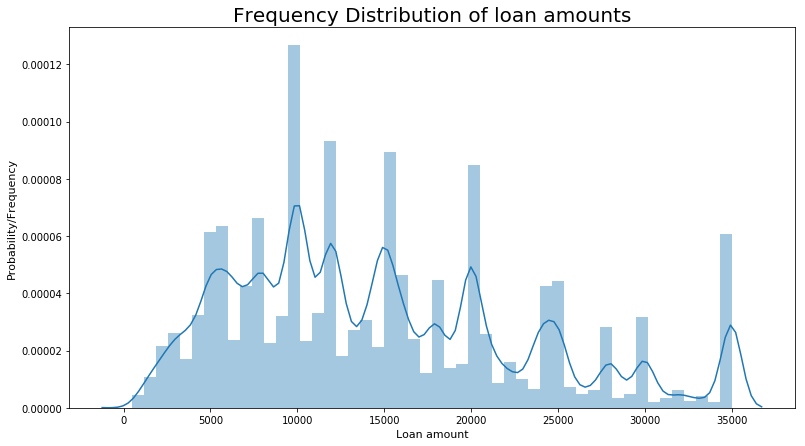

In [11]:
plt.figure(figsize=(13, 7))

g = sns.distplot(df_def["loan_amnt"])
g.set_xlabel("Loan amount", fontsize=11)
g.set_ylabel("Probability/Frequency", fontsize=11)
g.set_title("Frequency Distribution of loan amounts", fontsize=20)

plt.show()

##### Loan Status 

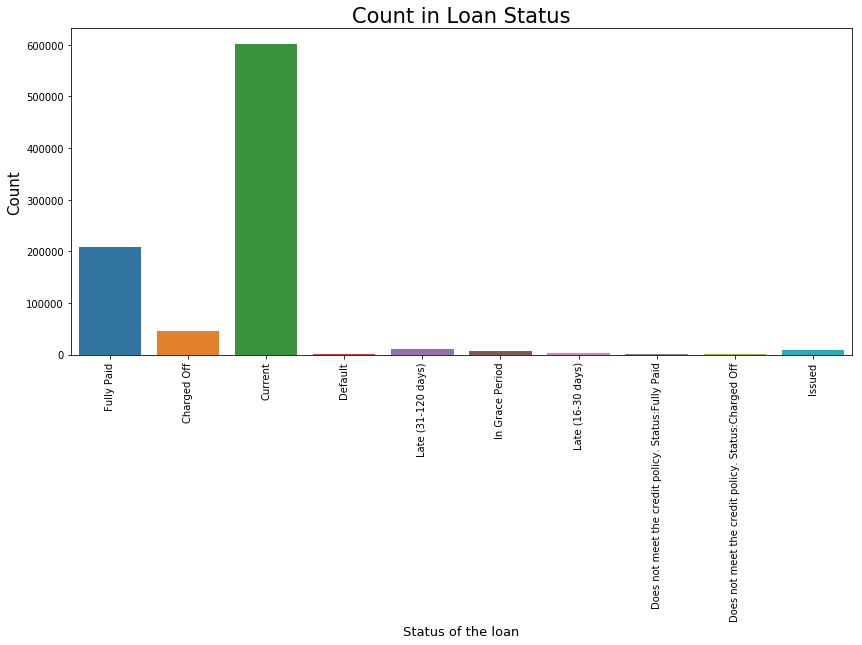

In [12]:
plt.figure(figsize = (14,6))

g = sns.countplot(x="loan_status", data=df_def)
g.set_xticklabels(g.get_xticklabels(),rotation=90)
g.set_xlabel("Status of the loan", fontsize=13)
g.set_ylabel("Count", fontsize=15)
g.set_title("Count in Loan Status", fontsize=21)

plt.show()

### c) Summary statistics

In [13]:
df_def.describe()

,loan_amnt,funded_amnt,int_rate,annual_inc,dti,revol_bal,total_pymnt
count,887375.000000,887375.000000,887375.000000,8.873750e+05,887375.000000,8.873750e+05,887375.000000
mean,14755.302719,14741.915678,13.246764,7.502759e+04,18.157113,1.692086e+04,7558.828791
std,8435.455353,8429.897443,4.381862,6.469830e+04,17.190629,2.242681e+04,7871.260790
min,500.000000,500.000000,5.320000,0.000000e+00,0.000000,0.000000e+00,0.000000
25%,8000.000000,8000.000000,9.990000,4.500000e+04,11.910000,6.443500e+03,1914.590000
50%,13000.000000,13000.000000,12.990000,6.500000e+04,17.650000,1.187500e+04,4894.950000
75%,20000.000000,20000.000000,16.200000,9.000000e+04,23.950000,2.082900e+04,10616.844231
max,35000.000000,35000.000000,28.990000,9.500000e+06,9999.000000,2.904836e+06,57777.579870


## 3. Business analysis (Section 2) 

#### Question a) 

For this section, we are only analyzing 36 month term loans.  

In [14]:
# See format "term" column
df_def["term"].iloc[0]

' 36 months'

In [15]:
# Select 36 month term loans
df_def_36m = df_def[df_def.term == " 36 months"]

In [16]:
df_def_36m.head()

,loan_amnt,funded_amnt,term,int_rate,grade,annual_inc,issue_d,dti,revol_bal,total_pymnt,loan_status
0,5000.0,5000.0,36 months,10.65,B,24000.0,Dec-2011,27.65,13648.0,5861.071414,Fully Paid
2,2400.0,2400.0,36 months,15.96,C,12252.0,Dec-2011,8.72,2956.0,3003.653644,Fully Paid
3,10000.0,10000.0,36 months,13.49,C,49200.0,Dec-2011,20.00,5598.0,12226.302212,Fully Paid
5,5000.0,5000.0,36 months,7.90,A,36000.0,Dec-2011,11.20,7963.0,5631.377753,Fully Paid
7,3000.0,3000.0,36 months,18.64,E,48000.0,Dec-2011,5.35,8221.0,3938.144334,Fully Paid


In [17]:
df_def_36m.shape

(621121, 11)

In [18]:
# Simplify loan_status labels to avoid confusion
df_def_36m.loan_status[df_def_36m.loan_status=="Does not meet the credit policy. Status:Charged Off"] = "Charged Off"
df_def_36m.loan_status[df_def_36m.loan_status=="Does not meet the credit policy. Status:Fully Paid"] = "Fully Paid"

/Users/cbartolm/anaconda/envs/cs230/lib/python3.5/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/cbartolm/anaconda/envs/cs230/lib/python3.5/site-packages/pandas/core/generic.py:5233: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
/Users/cbartolm/anaconda/envs/cs230/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2862: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  exec(code_obj, self.user_global_ns,

In [19]:
df_def_36m.groupby(by = "loan_status").count()

,loan_amnt,funded_amnt,term,int_rate,grade,annual_inc,issue_d,dti,revol_bal,total_pymnt
loan_status,,,,,,,,,,
Charged Off,29732,29732,29732,29732,29732,29732,29732,29732,29732,29732
Current,402848,402848,402848,402848,402848,402848,402848,402848,402848,402848
Default,715,715,715,715,715,715,715,715,715,715
Fully Paid,169360,169360,169360,169360,169360,169360,169360,169360,169360,169360
In Grace Period,3975,3975,3975,3975,3975,3975,3975,3975,3975,3975
Issued,5982,5982,5982,5982,5982,5982,5982,5982,5982,5982
Late (16-30 days),1483,1483,1483,1483,1483,1483,1483,1483,1483,1483
Late (31-120 days),7026,7026,7026,7026,7026,7026,7026,7026,7026,7026


In [20]:
# Compute percentage of fully paid loans
percent_fully_paid = sum(df_def_36m.loan_status == "Fully Paid")/df_def_36m.shape[0]

In [21]:
result1 = percent_fully_paid*100
result1

27.266828846553249

The percentage of loans that have been fully paid is **27.267%**

#### Question b)

Simplifying assumption: We are ignoring the months, we just take into account the year.

In [22]:
# Parse the year from the issue_d column (get rid of months)
df_def_36m["issue_d"] = df_def_36m["issue_d"].apply(lambda x: x[-4:])

/Users/cbartolm/anaconda/envs/cs230/lib/python3.5/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [23]:
groupby_issued_grade = df_def_36m.groupby(by =["issue_d","grade"])

In [24]:
results = {}
for group in groupby_issued_grade.groups.keys():
    # Handle parsing edge_case
    if group == (' Off', 'Charged Off') or group == ('Paid', 'Fully Paid') :
        continue
    df_group = groupby_issued_grade.get_group(group)
    
    #Compute default rate
    results[group] = sum(df_group.loan_status != "Fully Paid")/df_group.shape[0]

In [25]:
rate_of_defaults = pd.Series(results)
print(rate_of_defaults, " \n")
max(rate_of_defaults.values)

2007  A    0.054054
      B    0.163265
      C    0.241135
      D    0.313131
      E    0.310000
      F    0.480769
      G    0.485714
2008  A    0.059748
      B    0.173401
      C    0.210345
      D    0.264916
      E    0.263158
      F    0.342342
      G    0.325581
2009  A    0.067332
      B    0.121799
      C    0.152819
      D    0.179927
      E    0.217532
      F    0.266667
      G    0.327273
2010  A    0.043631
      B    0.096257
      C    0.135266
      D    0.185954
      E    0.196429
      F    0.296703
      G    0.352941
2011  A    0.063990
      B    0.105676
             ...   
      F    0.240741
      G    0.400000
2012  A    0.072910
      B    0.127462
      C    0.178247
      D    0.214230
      E    0.223899
      F    0.184466
      G    0.166667
2013  A    0.527590
      B    0.528972
      C    0.547798
      D    0.573891
      E    0.612074
      F    0.630972
      G    0.600000
2014  A    0.754932
      B    0.733820
      C    0.738636


0.95531220145156925

In [26]:
rate_of_defaults[rate_of_defaults == max(rate_of_defaults.values)]

2015  A    0.955312
dtype: float64

The cohort with highest rate of defaults is the one that **had Grade A in year 2015**. It makes sense as the last year of the dataset is 2015 and we have lots of new loans that haven't been completed. 

#### Question c)

In [27]:
results_qc = {}
for group in groupby_issued_grade.groups.keys():
    # Handle parsing edge_case
    if group == (' Off', 'Charged Off') or group == ('Paid', 'Fully Paid') :
        continue
    df_group = groupby_issued_grade.get_group(group)
    
    # Annualized rate of return 
    results_qc[group] = (df_group.total_pymnt.sum()/df_group.funded_amnt.sum()) ** (1/3) - 1  

In [28]:
# Rate of return each group (Needs review!)
results_qc

{('2007', 'A'): 0.029510981234221134,
 ('2007', 'B'): 0.005633400732221183,
 ('2007', 'C'): 0.00459174891493741,
 ('2007', 'D'): -0.004947639441878815,
 ('2007', 'E'): -0.007924172491307502,
 ('2007', 'F'): -0.05361465639206042,
 ('2007', 'G'): -0.018772488803600162,
 ('2008', 'A'): 0.02517599950580096,
 ('2008', 'B'): 0.011570397871041749,
 ('2008', 'C'): 0.005625786546544553,
 ('2008', 'D'): -0.007406748263316998,
 ('2008', 'E'): 0.012789590802013917,
 ('2008', 'F'): -0.019383156903218457,
 ('2008', 'G'): 0.0011486994276166396,
 ('2009', 'A'): 0.025974351901660198,
 ('2009', 'B'): 0.024575265524935164,
 ('2009', 'C'): 0.026517979503528633,
 ('2009', 'D'): 0.02968872780333487,
 ('2009', 'E'): 0.024362380033757125,
 ('2009', 'F'): 0.009906796177223454,
 ('2009', 'G'): 0.022791411315016274,
 ('2010', 'A'): 0.02497368520082688,
 ('2010', 'B'): 0.03068065271887077,
 ('2010', 'C'): 0.034709337171348276,
 ('2010', 'D'): 0.03527269522568188,
 ('2010', 'E'): 0.03696247325978774,
 ('2010', 'F'

## Part III: Prediction with Logistic Regression 

### 1) Preprocessing required to satisfy the requirements of Part 3: 

- (i) you are given the ability to invest in each loan independently
- (ii) you invest immediately following loan origination and hold to maturity (36 months)
- (iii) all loan fields that would be known upon origination are made available to you. 

In [71]:
# Recall basic properties of the filtered dataset with the 36 month term loans
df_def_36m.shape

(621121, 11)

In [72]:
df_def_36m.head(10)

,loan_amnt,funded_amnt,term,int_rate,grade,annual_inc,issue_d,dti,revol_bal,total_pymnt,loan_status
0,5000.0,5000.0,36 months,10.65,B,24000.0,2011,27.65,13648.0,5861.071414,Fully Paid
2,2400.0,2400.0,36 months,15.96,C,12252.0,2011,8.72,2956.0,3003.653644,Fully Paid
3,10000.0,10000.0,36 months,13.49,C,49200.0,2011,20.00,5598.0,12226.302212,Fully Paid
5,5000.0,5000.0,36 months,7.90,A,36000.0,2011,11.20,7963.0,5631.377753,Fully Paid
7,3000.0,3000.0,36 months,18.64,E,48000.0,2011,5.35,8221.0,3938.144334,Fully Paid
11,12000.0,12000.0,36 months,12.69,B,75000.0,2011,10.78,23336.0,13943.080000,Fully Paid
12,9000.0,9000.0,36 months,13.49,C,30000.0,2011,10.08,10452.0,2270.700000,Default
13,3000.0,3000.0,36 months,9.91,B,15000.0,2011,12.56,7323.0,3478.981915,Fully Paid
14,10000.0,10000.0,36 months,10.65,B,100000.0,2011,7.06,11997.0,7471.990000,Default
15,1000.0,1000.0,36 months,16.29,D,28000.0,2011,20.31,6524.0,1270.171106,Fully Paid


In [73]:
# Check validity condition
(df_def_36m.loan_status != "Fully Paid").head()

0    False
2    False
3    False
5    False
7    False
Name: loan_status, dtype: bool

In [74]:
# Store the dataframe in a new variable for prediction
df_def_36m_prediction = df_def_36m

# Label all training examples that are not fully paid as Default
df_def_36m_prediction.loan_status[df_def_36m_prediction.loan_status != "Fully Paid"] = "Default"

/Users/cbartolm/anaconda/envs/cs230/lib/python3.5/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/Users/cbartolm/anaconda/envs/cs230/lib/python3.5/site-packages/pandas/core/generic.py:5233: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
/Users/cbartolm/anaconda/envs/cs230/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2862: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  exec(code_obj, self.user_global_

In [75]:
# Sanity-check
df_def_36m_prediction.head(20)

,loan_amnt,funded_amnt,term,int_rate,grade,annual_inc,issue_d,dti,revol_bal,total_pymnt,loan_status
0,5000.0,5000.0,36 months,10.65,B,24000.00,2011,27.65,13648.0,5861.071414,Fully Paid
2,2400.0,2400.0,36 months,15.96,C,12252.00,2011,8.72,2956.0,3003.653644,Fully Paid
3,10000.0,10000.0,36 months,13.49,C,49200.00,2011,20.00,5598.0,12226.302212,Fully Paid
5,5000.0,5000.0,36 months,7.90,A,36000.00,2011,11.20,7963.0,5631.377753,Fully Paid
7,3000.0,3000.0,36 months,18.64,E,48000.00,2011,5.35,8221.0,3938.144334,Fully Paid
11,12000.0,12000.0,36 months,12.69,B,75000.00,2011,10.78,23336.0,13943.080000,Fully Paid
12,9000.0,9000.0,36 months,13.49,C,30000.00,2011,10.08,10452.0,2270.700000,Default
13,3000.0,3000.0,36 months,9.91,B,15000.00,2011,12.56,7323.0,3478.981915,Fully Paid
14,10000.0,10000.0,36 months,10.65,B,100000.00,2011,7.06,11997.0,7471.990000,Default
15,1000.0,1000.0,36 months,16.29,D,28000.00,2011,20.31,6524.0,1270.171106,Fully Paid


In [76]:
# Check that there are not NAN values (Could cause problems later on in sklearn)
print(df_def_36m_prediction.isnull().sum())

loan_amnt      0
funded_amnt    0
term           0
int_rate       0
grade          0
annual_inc     0
issue_d        0
dti            0
revol_bal      0
total_pymnt    0
loan_status    0
dtype: int64


In [77]:
# See what is the range of years for recorded loans
set(df_def_36m_prediction["issue_d"].values)

{'2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015'}

In [78]:
df_def_36m_prediction["issue_d"].value_counts()

2015    283172
2014    162569
2013    100380
2012     43470
2011     14101
2010      9156
2009      5281
2008      2393
2007       599
Name: issue_d, dtype: int64

In [79]:
'''ASSUMPTION 1:
# Remove loans issued in the last three years (not enough time to assess performance in 36 months).
# Coarse simplification to satisfy analysis requirements (We are droping more than 50% of the data!)
'''

print(df_def_36m_prediction.shape, "\n")
df_def_36m_prediction = \
df_def_36m_prediction.drop(df_def_36m_prediction[df_def_36m_prediction.issue_d == '2015'].index)
print(df_def_36m_prediction.shape)
df_def_36m_prediction = df_def_36m_prediction.drop(df_def_36m_prediction[df_def_36m_prediction.issue_d == '2014'].index)
print(df_def_36m_prediction.shape)
df_def_36m_prediction = df_def_36m_prediction.drop(df_def_36m_prediction[df_def_36m_prediction.issue_d == '2013'].index)
print(df_def_36m_prediction.shape)

(621121, 11) 

(337949, 11)
(175380, 11)
(75000, 11)


In [80]:
print(df_def_36m_prediction["issue_d"].value_counts(), "\n")
print(df_def_36m_prediction.shape)

2012    43470
2011    14101
2010     9156
2009     5281
2008     2393
2007      599
Name: issue_d, dtype: int64 

(75000, 11)


In [81]:
''' ASSUMPTION 2:
The response variable for this prediction task is the loan_status column.
As it is a binary value {'Fully_Paid', 'Default'}, we are going to perform a binary classification task.
We are going to assume that the other 10 columns are available from the customer before issuing a loan. 
Thus, we are going to use them as covariates for this prediction task. 
'''

" ASSUMPTION 2:\nThe response variable for this prediction task is the loan_status column.\nAs it is a binary value {'Fully_Paid', 'Default'}, we are going to perform a binary classification task.\nWe are going to assume that the other 10 columns are available from the customer before issuing a loan. \nThus, we are going to use them as covariates for this prediction task. \n"

### Dataframe optimization before running sklearn algorithms

In [82]:
# Check dtypes of the features/covariates
df_def_36m_prediction.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75000 entries, 0 to 230655
Data columns (total 11 columns):
loan_amnt      75000 non-null float64
funded_amnt    75000 non-null float64
term           75000 non-null object
int_rate       75000 non-null float64
grade          75000 non-null object
annual_inc     75000 non-null float64
issue_d        75000 non-null object
dti            75000 non-null float64
revol_bal      75000 non-null float64
total_pymnt    75000 non-null float64
loan_status    75000 non-null object
dtypes: float64(7), object(4)
memory usage: 6.9+ MB


In [83]:
## Dataframe Optimization to speed up ML algorithms

# Drop term column (doesn't provide extra information as it is single valued)
df_def_36m_prediction = df_def_36m_prediction.drop('term', axis = 1)

# Dtype transformation
df_def_36m_prediction['funded_amnt'].astype(int)
df_def_36m_prediction['loan_amnt'].astype(int)
df_def_36m_prediction['annual_inc'].astype(int)
df_def_36m_prediction['revol_bal'].astype(int)

df_def_36m_prediction['int_rate'].astype(float)
df_def_36m_prediction['dti'].astype(float)
df_def_36m_prediction['total_pymnt'].astype(float)

from sklearn.preprocessing import LabelEncoder

columns = ['grade', 'issue_d', 'loan_status']

for column in columns:
    if df_def_36m_prediction[column].dtype == type(object):
        le = LabelEncoder()
        df_def_36m_prediction[column] = le.fit_transform(df_def_36m_prediction[column])

In [84]:
df_def_36m_prediction.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75000 entries, 0 to 230655
Data columns (total 10 columns):
loan_amnt      75000 non-null float64
funded_amnt    75000 non-null float64
int_rate       75000 non-null float64
grade          75000 non-null int64
annual_inc     75000 non-null float64
issue_d        75000 non-null int64
dti            75000 non-null float64
revol_bal      75000 non-null float64
total_pymnt    75000 non-null float64
loan_status    75000 non-null int64
dtypes: float64(7), int64(3)
memory usage: 6.3 MB


We went from **6.9MB to 6.3MB** of memory usage

### Train-Dev-Test Split 

In [85]:
# Distinguish covariates from response variables
all_y_clean = df_def_36m_prediction['loan_status']
all_X_clean = df_def_36m_prediction.drop('loan_status', axis = 1)

print(all_y_clean.shape)
print(all_X_clean.shape)

(75000,)
(75000, 9)


In [86]:
from sklearn.model_selection import train_test_split

X_temp, X_test, y_temp, y_test = train_test_split(all_X_clean, all_y_clean, test_size=0.15, random_state=7)
X_train, X_dev, y_train, y_dev = train_test_split(X_temp, y_temp, test_size=0.15, random_state=7)

In [87]:
print(X_train.shape)
print(X_dev.shape)
print(X_test.shape)

proportion_train = int(X_train.shape[0])/int(all_y_clean.shape[0])
proportion_dev = int(X_dev.shape[0])/int(all_y_clean.shape[0])
proportion_test = int(X_test.shape[0])/int(all_y_clean.shape[0])

print("\n The train-dev-test split is: ", proportion_train, proportion_dev, proportion_test)

(54187, 9)
(9563, 9)
(11250, 9)

 The train-dev-test split is:  0.7224933333333333 0.12750666666666666 0.15


### Logistic regression 

In [89]:
import sklearn
import time

from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()

start = time.time()

classifier.fit(X_train, y_train)

end = time.time()

print("Total time invested in fitting the Logistic Classifier: ", end-start, "\n")

print("Model slope:    ", classifier.coef_[0])
print("Model intercept:", classifier.intercept_)

Model slope:     [  5.75114653e-05  -3.09084639e-03   2.73951043e-03  -9.43142930e-04
   2.93935573e-05   3.13425435e-03   8.84875898e-03  -9.38557692e-06
   2.91157384e-03]
Model intercept: [ 0.00082603]


In [90]:
X_train.columns

Index(['loan_amnt', 'funded_amnt', 'int_rate', 'grade', 'annual_inc',
       'issue_d', 'dti', 'revol_bal', 'total_pymnt'],
      dtype='object')

One of the advantages of Logistic Regression is that it is a statistical model easy to interpret. The trained coefficients can give us information about what is the model taking into account when making predictions. Those can be obtained by calling the property "coef_[0]" of the LogicticRegression() instance. 

From the coefficients, we can infer two things: 

- The sign of the association between the response variable and a particular covariate
- The intensity/importance of that association --> You can compare importance of covariates between each other

In this case, the covariate 'funded_amnt' has a negative relationship with Fully Paid loans, suggesting that loans are more rarely paid when the amount of the loan increases. Analogously, this analysis can be repeated with all other covariates.

In absolute value, 'funded_amnt', 'int_rate', 'total_pymnt', 'issue_d', 'dti' seem to be the most important features to predict the response variable

In [ ]:
from sklearn.metrics import accuracy_score

yfit_dev = classifier.predict(X_dev)
yfit_test = classifier.predict(X_test)

print("The dev set accuracy is: ", accuracy_score(y_dev, yfit_dev))
print("The test set accuracy is: ", accuracy_score(y_test, yfit_test))

The way the performance has been measured is by splitting the cleaned dataset in a train, dev and test set. As the size of the dataset was big enough, no cross-validation has been used to perform this split (could be done quickly with a sklearn function called KFold()). This makes our out-of-sample estimate of the generalization error less biased compared of using the cross-validation technique. 

The dev set could be used to tune the hyperparameters and also to select the most appropriate ML model for the dataset and task at hand. Due to time constraints, it wasn't possible to play with the usual hyperparameters such as: regularization, norm of the norm-penalty term of the loss function etc..

In [ ]:
# Biased dataset?
counts = df_def_36m_prediction['loan_status'].value_counts()

# Compute proportion of fully_paid vs. Default in the response variable:
proportion_pos_neg_labels = counts[0]/counts[1]
print("The ratio of positive output labels with respect negative labels in the response variable is: ", \
     proportion_pos_neg_labels)

The response variable has lots of positive examples (fully paid loans) and a few negative examples (default loans) --> The response variable is not balanced. This suggests that the accuracy metric is not as good as it seems (although, we can say the logistic classifier did a pretty decent job)

In these situations, it is always useful to plot a confusion matrix to see the number of True Positives, False Positives, True Negatives and False Negatives. 

Other ML algorithms could be used thanks to scikit-learn such as: 

- Naive Bayes: A generative model for binary classification
    (from sklearn.naive_bayes import MultinomialNB)
- Support Vector Machines (SVMs); from sklearn.svm import SVC
- Decision Trees and Random Forest classifiers: from sklearn.tree import DecisionTreeClassifier

Even some unsupervised preprocessing techniques can be used very easily:

- PCA or Manifold for dimensionality reduction: from sklearn.decomposition import PCA

With more time, a Fully Connected Neural Network (or MLP) could have been implemented with either Keras, Pytorch or Tensorflow Python libraries. However, the state-of-the-art performance for this task would probably come from gradient boosting algorithms (XGboost or LightGBM) as we are dealing with a tabular structured dataset.